In [1]:
import torch
import framework.nn_fw as nn 
import framework.train_test_fw as tt
from visualization import *
from tqdm.notebook import tqdm
from generate_data import *
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Generate Data as instructed in task

In [2]:
data = generate_disc_set(2_000, split=.5, one_hot_labels=False)

Checking wether dataset is created correctly

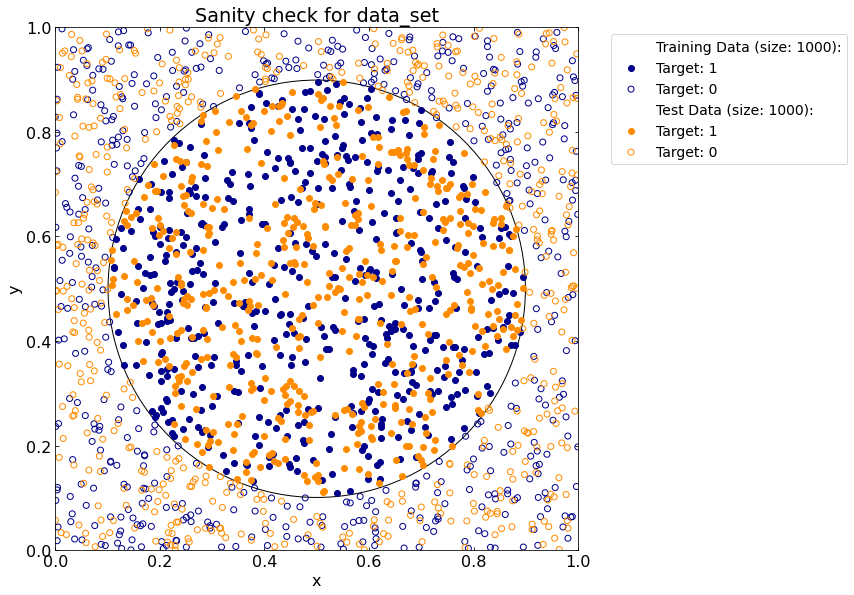

In [3]:
plot_data(data)

In [4]:
model = nn.Sequential
architecture = (nn.Linear(2, 25), nn.Sigmoid(), nn.Linear(25, 25), nn.ReLU(), nn.Linear(25, 1), nn.ReLU())

  0%|          | 0/5 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (48.900%), Accuracy(Test): (48.900%)00%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (50.600%), Accuracy(Test): (48.300%)00%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (47.800%), Accuracy(Test): (48.900%)00%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (46.800%), Accuracy(Test): (48.900%)00%)
ran for a total of 100 epochs

 

[Final Result] Accuracy(Training): (48.500%), Accuracy(Test): (44.800%)00%)
ran for a total of 100 epochs

 



('test',
 tensor([0.4960, 0.4968, 0.4798, 0.4794, 0.4794, 0.4794, 0.4794, 0.4792, 0.4792,
         0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792,
         0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792,
         0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4794, 0.4794, 0.4794,
         0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794,
         0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4792, 0.4792, 0.4792,
         0.4792, 0.4790, 0.4790, 0.4790, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792,
         0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792, 0.4792,
         0.4792, 0.4792, 0.4792, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794,
         0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794,
         0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4794, 0.4796, 0.4796, 0.4796,
         0.4796]),
 tensor([0.0000, 0.0080, 0.0151, 0.0160, 0.0160, 0.0160, 0.0160, 0.0165, 0.0165,


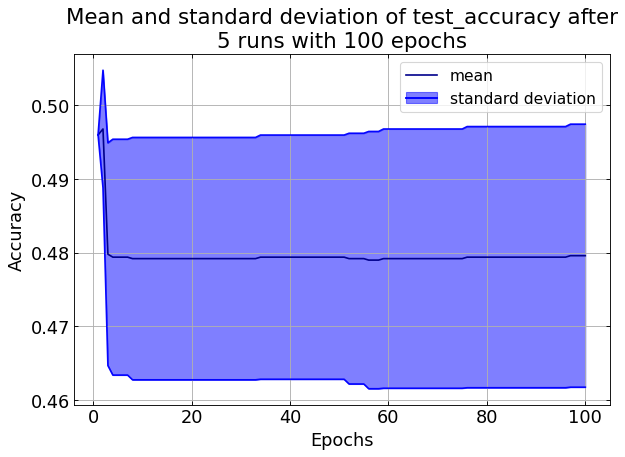

In [5]:
trial_name = "test"
nb_trials = 5
epochs = 100
batch_size = 100
learning_rate = 0.0001



tt.run_analysis(model, architecture, data, nb_trials, epochs, device, batch_size=batch_size, lr = learning_rate, name = trial_name)

In [6]:
best_run = nn.load_model("best_model_" + trial_name + '_epochs_{}'.format(epochs))
output = best_run(data[2])
errors = tt.compute_nb_errors(output, data[3])
accuracy = 1 - errors/(data[2].shape[0])

print("The best performing model from the previous analysis achieves: \n")
print("Test accuracy: ({:.3f}%)".format(100. * accuracy), "   |     Total number of errors {}".format(errors))

The best performing model from the previous analysis achieves: 

Test accuracy: (44.800%)    |     Total number of errors 552
